# Introducción

Se tomó la decisión de unir cuatro (4) bases de datos correspondientes a los cuatro (4) trimestres del año de estudio. Esta integración de los datos permite entender mejor las tendencias anuales en los precios de la gasolina y las diferencias entre los distintos tipos de combustibles y tipos de gasolineras (banderas).

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

trimestre1 = pd.read_csv("precios.csv")
trimestre2 = pd.read_csv("precios (1).csv")
trimestre3 = pd.read_csv("precios (2).csv")
trimestre4 = pd.read_csv("precios (3).csv")

trimestre1.columns = trimestre1.columns.str.replace(' ', '')
trimestre2.columns = trimestre2.columns.str.replace(' ', '')
trimestre3.columns = trimestre3.columns.str.replace(' ', '')
trimestre4.columns = trimestre4.columns.str.replace(' ', '')


In [2]:
gasolina_2023 = pd.concat([
    trimestre1.assign(TRIMESTRE="Q1"),
    trimestre2.assign(TRIMESTRE="Q2"),
    trimestre3.assign(TRIMESTRE="Q3"),
    trimestre4.assign(TRIMESTRE="Q4")
])

gasolina_2023 = gasolina_2023[(gasolina_2023['VALORPRECIO'] > 1000) & (gasolina_2023['VALORPRECIO'] < 20000)]


# Análisis exploratorio
A continuación, se presentan una serie de gráficos que permiten explorar estos aspectos con más detalle.

## Histograma de Distribución de Precios de Gasolina

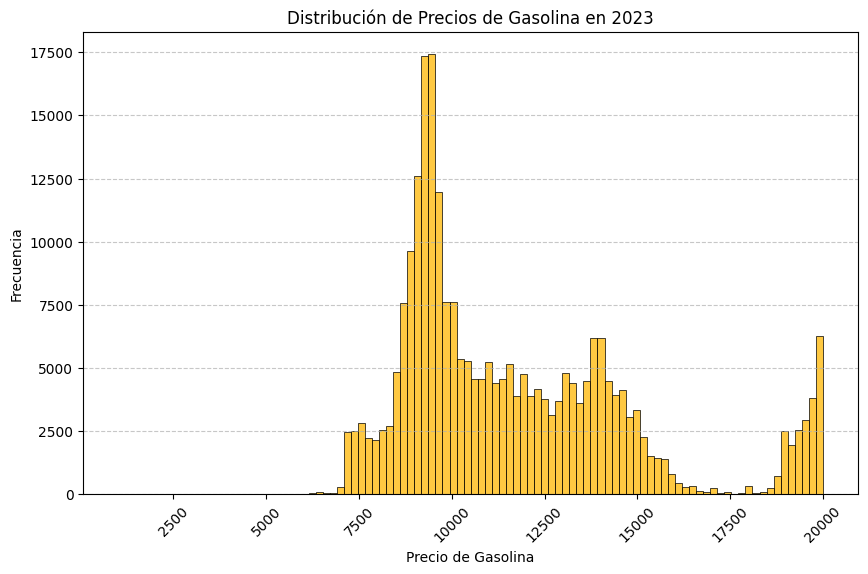

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(gasolina_2023['VALORPRECIO'], bins=100, color='#ffb703', kde=False)
plt.title('Distribución de Precios de Gasolina en 2023')
plt.xlabel('Precio de Gasolina')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

El histograma muestra la distribución de los precios de la gasolina en Colombia durante 2023, revelando una distribución asimétrica con un pico pronunciado entre los 10,000 y 12,000 pesos, que corresponde al rango de precios más común en el país. Además, se observan varios picos secundarios a lo largo del eje de los precios, lo que sugiere la existencia de subgrupos con diferentes frecuencias de precios, posiblemente debido a variaciones regionales, regulaciones locales o diferencias en los costos de distribución. La distribución presenta una cola larga hacia la derecha, indicando la presencia de algunos precios significativamente más altos que el rango más frecuente. Esto podría estar asociado con regiones más alejadas, mayores costos de transporte o políticas locales específicas que elevan los precios del combustible. En general, el gráfico evidencia una amplia variabilidad en los precios de la gasolina en Colombia, que van desde menos de 5,000 pesos hasta más de 20,000 pesos, resaltando las posibles disparidades entre diferentes regiones o condiciones económicas en el país.

## Gráfico de Cajas por Tipo de Combustible

C:\Users\sofmo\AppData\Local\Temp\ipykernel_11584\3155085974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gasolina_2023, x='PRODUCTO', y='VALORPRECIO', palette='Oranges')


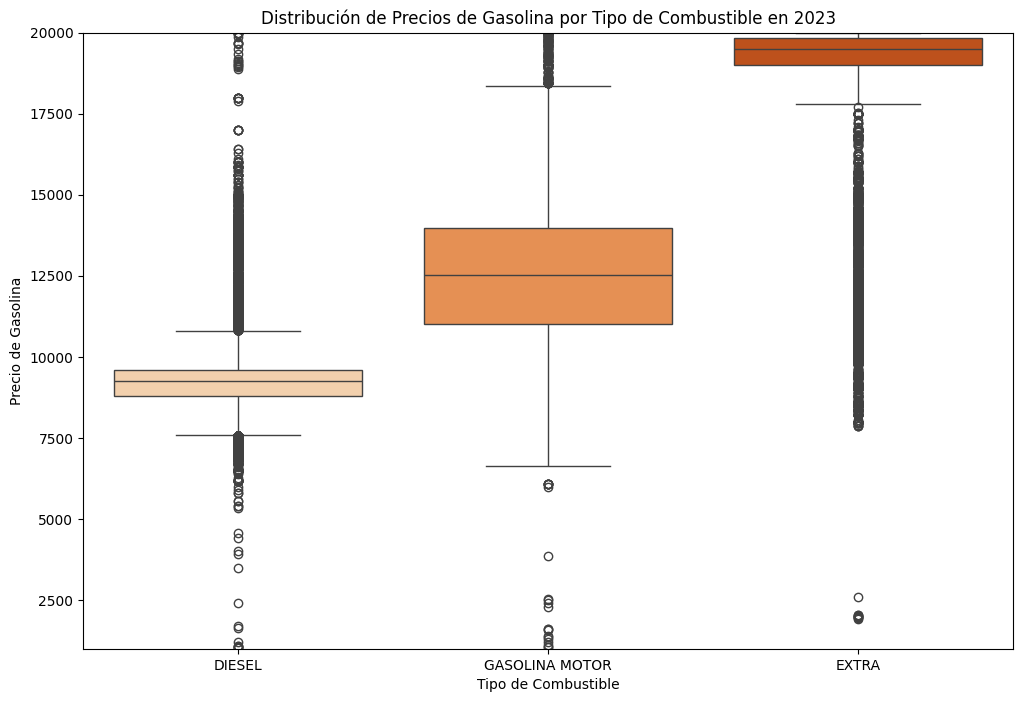

In [4]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gasolina_2023, x='PRODUCTO', y='VALORPRECIO', palette='Oranges')
plt.ylim(1000, 20000)
plt.title('Distribución de Precios de Gasolina por Tipo de Combustible en 2023')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Gasolina')
plt.show()

El gráfico de cajas muestra la distribución de los precios de la gasolina en Colombia durante 2023 según el tipo de combustible: Diesel, Extra y Gasolina Motor. Para el Diesel, los precios se concentran principalmente entre los 9,000 y 12,000 pesos, con algunos valores atípicos tanto por debajo de los 5,000 pesos como por encima de los 15,000 pesos, lo que sugiere cierta variabilidad en los precios dependiendo de la región o condiciones locales. En el caso de la Gasolina Extra, los precios se encuentran en un rango más alto, entre 18,000 y 20,000 pesos, y muestran una menor dispersión en comparación con otros tipos de combustible. Esto indica que la Gasolina Extra tiende a tener un precio más alto y estable. Por otro lado, la Gasolina Motor tiene precios que oscilan entre 10,000 y 15,000 pesos, con una dispersión moderada y algunos valores atípicos hacia ambos extremos, lo que sugiere una mayor variabilidad en los precios. En conjunto, el gráfico destaca diferencias notables en los precios según el tipo de combustible, mostrando que la Gasolina Extra es generalmente más cara y menos variable, mientras que el Diesel y la Gasolina Motor presentan una mayor dispersión de precios y más valores atípicos.

## Gráfico de Barras de Tipos de Gasolineras

C:\Users\sofmo\AppData\Local\Temp\ipykernel_11584\1150121010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gasolina_2023[gasolina_2023['BANDERA'].isin(top_gasolineras)],


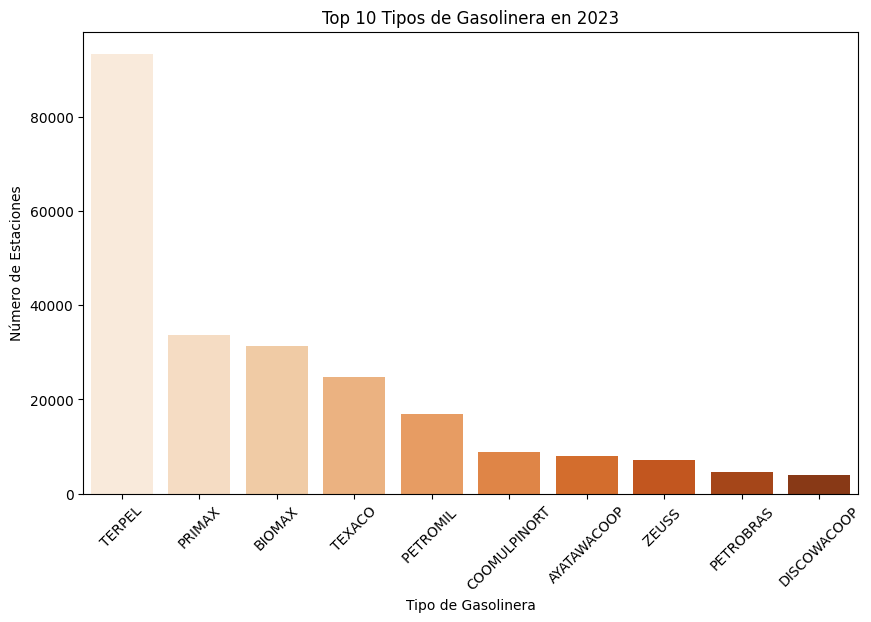

In [5]:
top_gasolineras = gasolina_2023['BANDERA'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(data=gasolina_2023[gasolina_2023['BANDERA'].isin(top_gasolineras)], 
              x='BANDERA', palette='Oranges', order=top_gasolineras)
plt.title('Top 10 Tipos de Gasolinera en 2023')
plt.xlabel('Tipo de Gasolinera')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45)
plt.show()


El gráfico de barras muestra los diez tipos de gasolineras más comunes en Colombia en 2023, destacando el número de estaciones de cada tipo. Terpel es claramente la gasolinera predominante, con más de 75,000 estaciones, lo que la coloca muy por encima de las demás en términos de presencia en el país. Le sigue Biomax, con alrededor de 30,000 estaciones, lo que indica una fuerte presencia pero significativamente menor en comparación con Terpel. Otras marcas como Primax, Texaco, y Petromil también tienen una cantidad considerable de estaciones, pero están en un rango de 10,000 a 25,000, mostrando una presencia moderada en el mercado.

El resto de las marcas, como COOMULPINORT, PETROBRAS, DISCOWA COOP, AYATAWACOOP, y ZEUSS, tienen muchas menos estaciones, todas por debajo de las 10,000, lo que sugiere una presencia más limitada. Este gráfico indica una concentración de mercado significativa, con Terpel dominando el número de estaciones de servicio en el país, seguida de lejos por Biomax, mientras que otras marcas compiten por una porción más pequeña del mercado.


## Mapa de Calor de Precios por Departamento y Trimestre

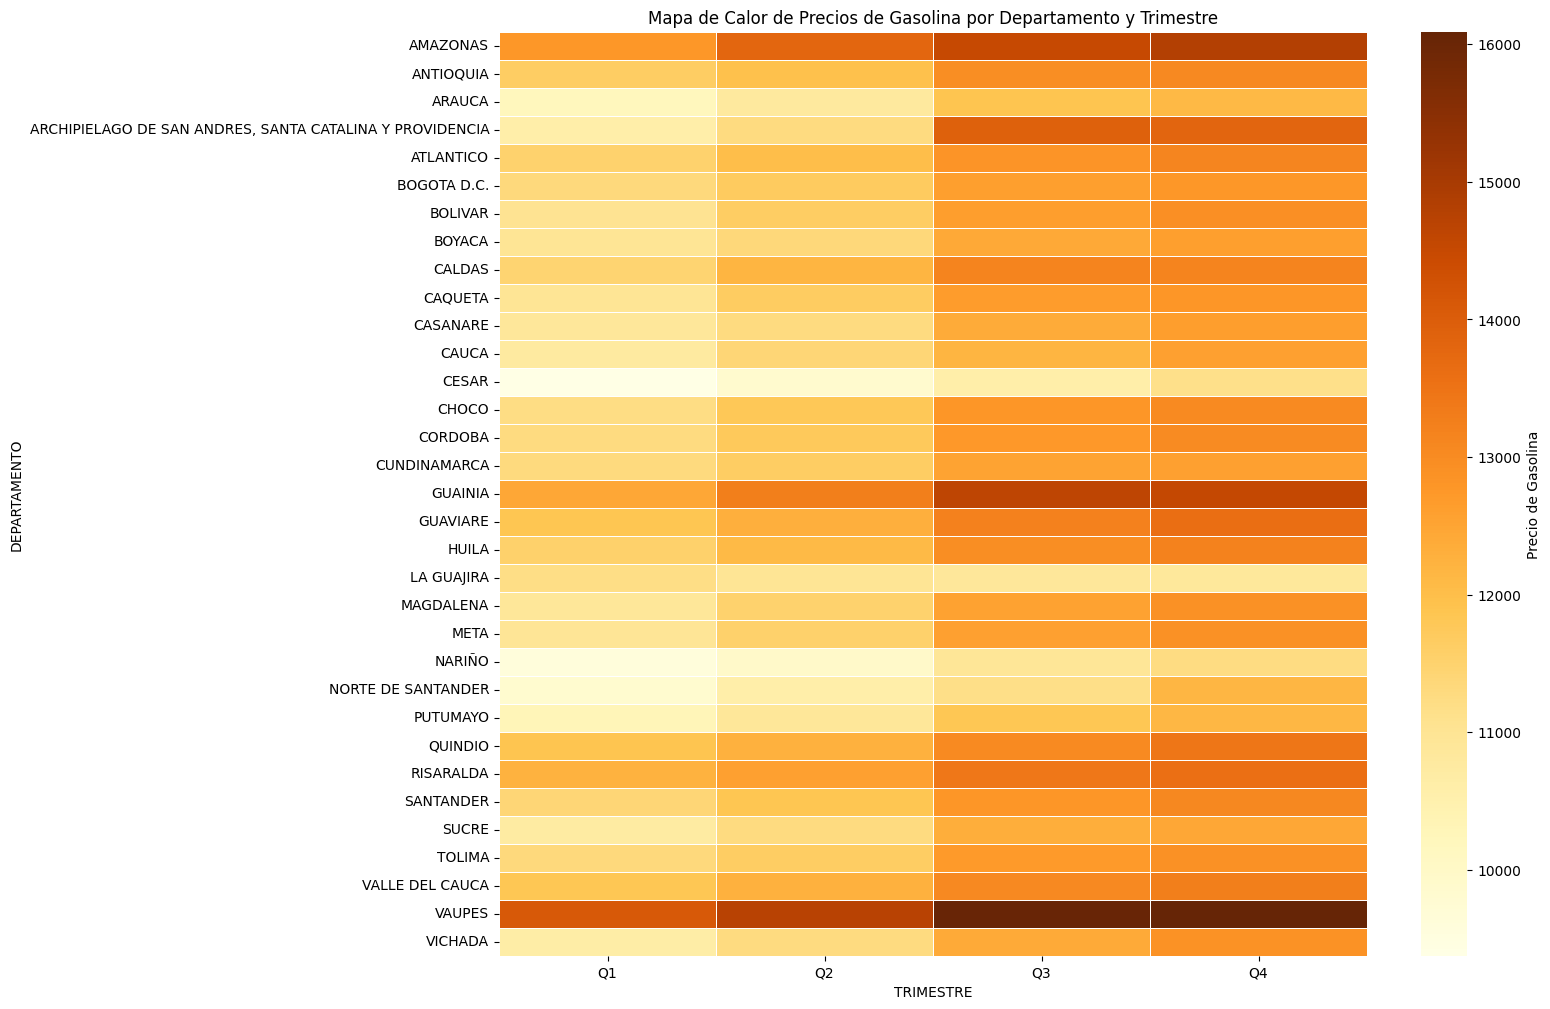

In [6]:
plt.figure(figsize=(14, 12))
departamentos = gasolina_2023['DEPARTAMENTO'].unique()
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']
heatmap_data = gasolina_2023.pivot_table(values='VALORPRECIO', index='DEPARTAMENTO', columns='TRIMESTRE', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlOrBr', linewidths=0.5, linecolor='white', cbar_kws={'label': 'Precio de Gasolina'})
plt.title('Mapa de Calor de Precios de Gasolina por Departamento y Trimestre')
plt.show()


El mapa de calor muestra la variación de los precios de la gasolina en Colombia por departamento durante los cuatro trimestres de 2023. Los colores van de amarillo (precios más bajos) a naranja oscuro (precios más altos). Se observa que departamentos como Vichada y Vaupés presentan precios más altos de forma consistente, mientras que Atlántico, Bogotá, y Antioquia tienen precios más bajos y estables a lo largo del año. En general, el gráfico evidencia ligeras variaciones regionales y temporales en los precios del combustible.

# Mapa Geográfico de Precios de Gasolina por Departamento

Esta sección presenta la distribución geográfica de los precios de los combustibles en Colombia durante 2023, utilizando mapas y gráficos para destacar las variaciones regionales. El objetivo es identificar patrones en los precios del combustible a lo largo del país y entender cómo estos pueden variar según la ubicación y el tipo de combustible.

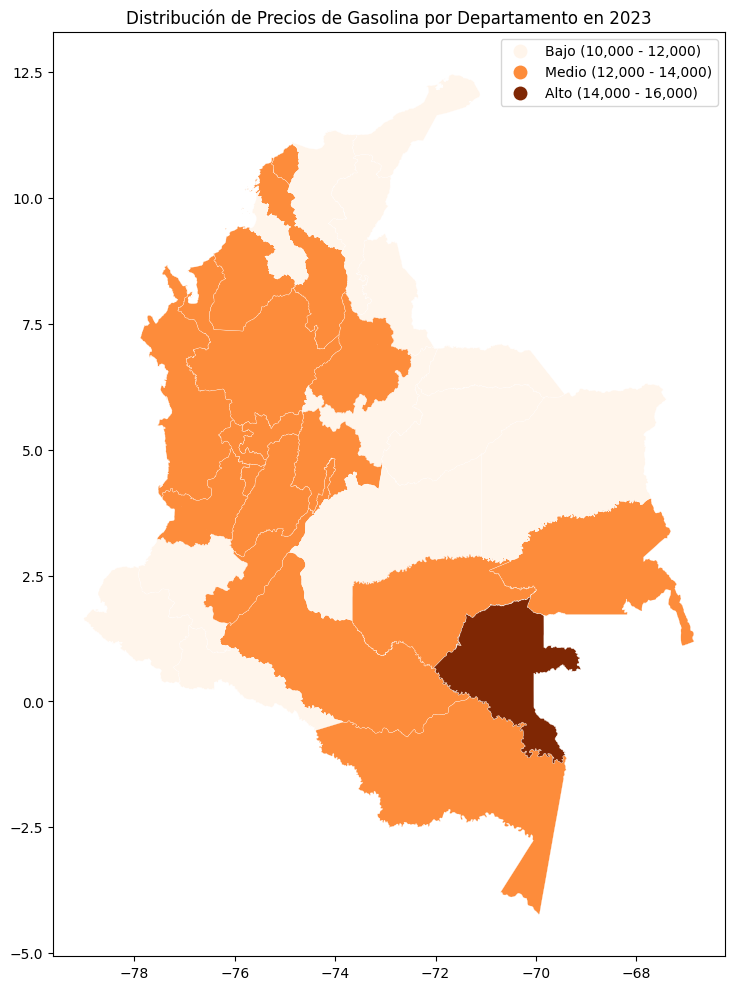

In [7]:
colombia_shape = gpd.read_file("C:/Users/sofmo/Documents/COLOMBIA/COLOMBIA.shp")

colombia_shape['DPTO_CNMBR'] = colombia_shape['DPTO_CNMBR'].replace({'NARI?O': 'NARIÑO'})

precios_promedio = gasolina_2023.groupby('DEPARTAMENTO')['VALORPRECIO'].mean().reset_index()

mapa_col = colombia_shape.merge(precios_promedio, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO', how='left')

bins = [10000, 12000, 14000, 16000]
labels = ["Bajo (10,000 - 12,000)", "Medio (12,000 - 14,000)", "Alto (14,000 - 16,000)"]
mapa_col['rango_precio'] = pd.cut(mapa_col['VALORPRECIO'], bins=bins, labels=labels, right=False)

fig, ax = plt.subplots(1, 1, figsize=(15, 12))
mapa_col.plot(column='rango_precio', cmap='Oranges', linewidth=0.2, ax=ax, edgecolor='white', legend=True)
plt.title('Distribución de Precios de Gasolina por Departamento en 2023')
plt.show()


El mapa muestra la distribución de los precios de los combustibles en Colombia en 2023, categorizados en rangos de precios bajos (10,000 - 12,000), medios (12,000 - 14,000) y altos (14,000 - 16,000). Se observa que la mayoría de los departamentos tienen precios de gasolina en el rango bajo a medio. Sin embargo, Vaupés se destaca con los precios más altos del país, seguido por algunos departamentos del sur como Guainía y Amazonas que también muestran precios elevados. Esto sugiere que en estas regiones más alejadas, posiblemente debido a dificultades logísticas y mayores costos de transporte, el precio del combustible es significativamente mayor en comparación con otras áreas del país.